# Simple Linear Regression (Delivery Time)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Impport Dataset
data1 = pd.read_csv('delivery_time.csv')
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data1.shape

(21, 2)

In [7]:
data1 = data1.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'})
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
print(data1)

       DT  ST
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [9]:
data1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

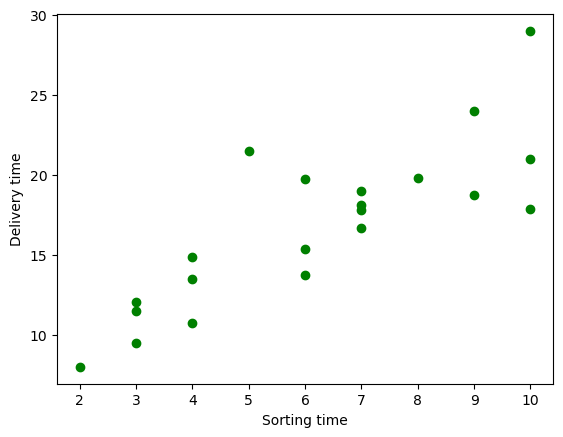

In [10]:
plt.scatter(x=data1.ST, y=data1.DT, color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x14a1e1b2220>,
 'caps': [<matplotlib.lines.Line2D at 0x14a1dfe0040>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a1e1b2850>],
 'medians': [<matplotlib.lines.Line2D at 0x14a1e076a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a1e076d60>],
 'means': []}

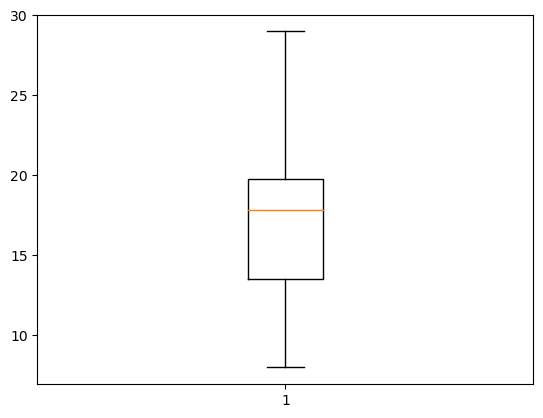

In [11]:
plt.boxplot(data1.DT)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

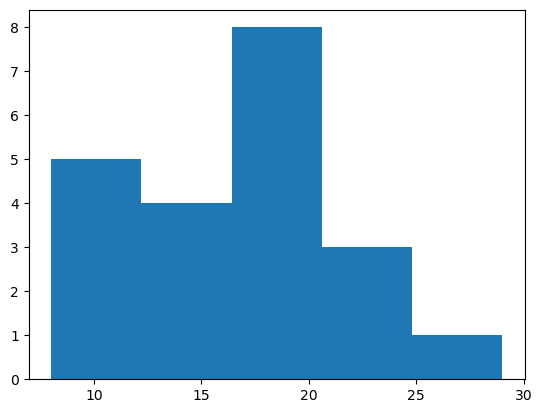

In [12]:
plt.hist(data1.DT, bins=5)

In [13]:
model2=smf.ols("DT~ST",data=data1).fit()

In [14]:
model2.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [15]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        18:02:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model3=smf.ols("DT~np.log(ST)",data=data1).fit()

In [17]:
model3.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [18]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        18:03:10   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,2.979134,10.186334
ST,1.108673,2.189367


In [20]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(ST),6.16977,11.917057


In [21]:
pred2 = model2.predict(data1) # Predicted values of dt using the model

In [22]:
pred3 = model3.predict(data1) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

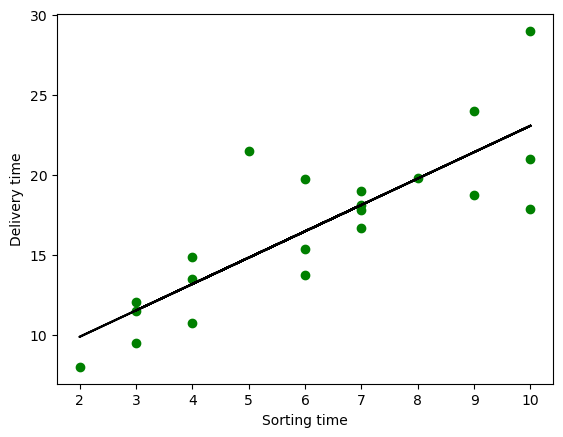

In [23]:
plt.scatter(x=data1.ST, y=data1.DT, color='green')
plt.plot(data1.ST, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

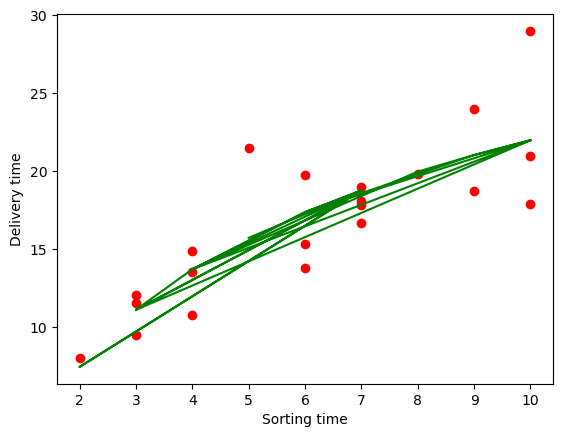

In [24]:
plt.scatter(x=data1.ST, y=data1.DT, color='red')
plt.plot(data1.ST, pred3,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")